In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("/cancer patient data sets.csv")

# Assuming the target column is named "target_column"
X = data.drop(columns=["Level"])
y = data["Level"]

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train your model (for example, Logistic Regression)
# Initialize and train your model with increased max_iter
model = LogisticRegression(max_iter=10000)  # Increase max_iter to 1000 or higher
model.fit(X_train, y_train)


# Predictions on training and test set
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Confusion Matrix and Classification Report for training data
train_conf_matrix = confusion_matrix(y_train, train_preds)
print("Confusion Matrix - Training Data:")
print(train_conf_matrix)
print("\nClassification Report - Training Data:")
print(classification_report(y_train, train_preds))

# Confusion Matrix and Classification Report for test data
test_conf_matrix = confusion_matrix(y_test, test_preds)
print("\nConfusion Matrix - Test Data:")
print(test_conf_matrix)
print("\nClassification Report - Test Data:")
print(classification_report(y_test, test_preds))


Confusion Matrix - Training Data:
[[283   0   0]
 [  0 240   8]
 [  0  10 259]]

Classification Report - Training Data:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       283
         Low       0.96      0.97      0.96       248
      Medium       0.97      0.96      0.97       269

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800


Confusion Matrix - Test Data:
[[82  0  0]
 [ 0 48  7]
 [ 0  2 61]]

Classification Report - Test Data:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       0.96      0.87      0.91        55
      Medium       0.90      0.97      0.93        63

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_path = r"/Lab Session1 Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Purchase data")

print("All Column Names:", df.columns)

actual_prices_column_name = 'Milk'
predicted_prices_column_name = 'Milk'

actual_prices = df[actual_prices_column_name].values
predicted_prices = df[predicted_prices_column_name].values

df_cleaned = df.dropna(subset=[actual_prices_column_name, predicted_prices_column_name])

actual_prices = df_cleaned[actual_prices_column_name].values
predicted_prices = df_cleaned[predicted_prices_column_name].values

print("Actual Values:", actual_prices)
print("Predicted Values:", predicted_prices)

mse = mean_squared_error(actual_prices, predicted_prices)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((actual_prices - predicted_prices) / actual_prices)) * 100

if len(actual_prices) >= 2:
    r2 = r2_score(actual_prices, predicted_prices)
    print(f'R-squared (R2) score: {r2}')
else:
    print('Insufficient samples to calculate R-squared.')

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


All Column Names: Index(['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)',
       'Payment (Rs)', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Candy', 'Mango', 'Milk'],
      dtype='object')
Actual Values: [18.]
Predicted Values: [18.]
Insufficient samples to calculate R-squared.
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Percentage Error (MAPE): 0.0


3


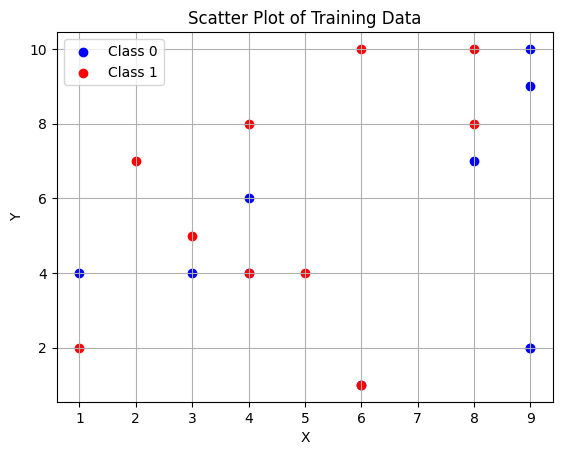

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv("/cancer patient data sets.csv")

np.random.seed(0)
num_points = 20
X_train = np.random.randint(1, 11, size=(num_points, 2))  # Random values between 1 and 10

# Assign these 20 points to 2 different classes (class0 - Blue & class1 - Red)
y_train = np.random.randint(0, 2, size=num_points)  # Randomly assign 0 or 1 to each point

# Separate points based on class
class0_points = X_train[y_train == 0]
class1_points = X_train[y_train == 1]

# Plot the training data
plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()


4

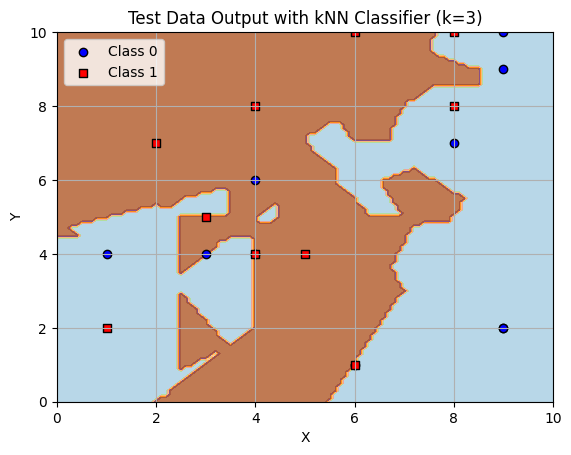

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate test set data
x_test, y_test = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.column_stack((x_test.ravel(), y_test.ravel()))

# Create kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the kNN classifier with the training data
knn_classifier.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = knn_classifier.predict(test_data)

# Reshape the predictions to match the shape of x_test and y_test
y_pred = y_pred.reshape(x_test.shape)

# Plot the test data output
plt.contourf(x_test, y_test, y_pred, cmap=plt.cm.Paired, alpha=0.8)

# Scatter plot of training data points
plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0', marker='o', edgecolors='black')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1', marker='s', edgecolors='black')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test Data Output with kNN Classifier (k=3)')
plt.legend()
plt.grid(True)
plt.show()



5

<ipython-input-6-83220f24b91d>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


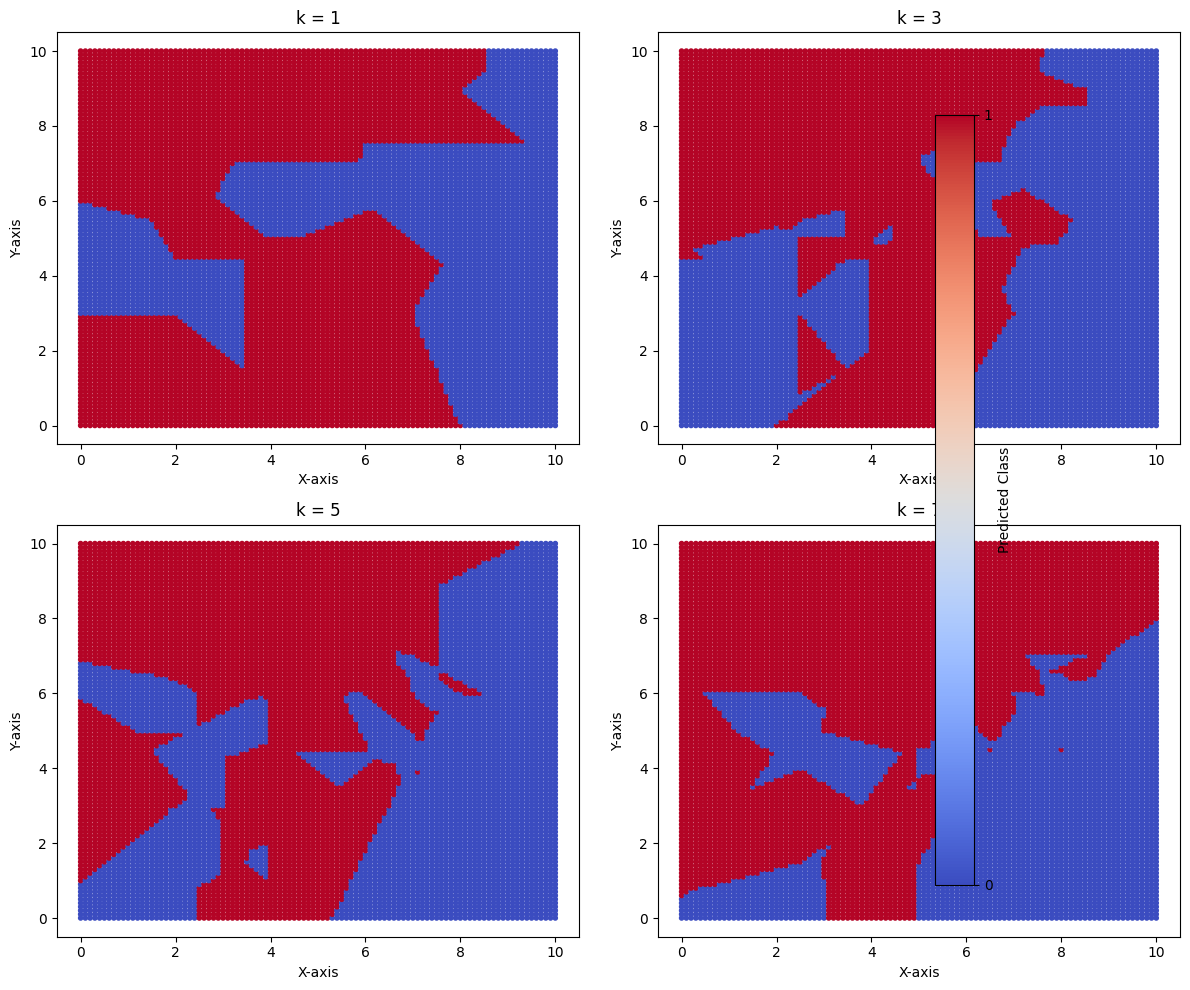

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate training set data (similar to the previous example)
np.random.seed(0)
num_points = 20
X_train = np.random.randint(1, 11, size=(num_points, 2))
y_train = np.random.randint(0, 2, size=num_points)

# Generate test set data
x_values_test = np.arange(0, 10.1, 0.1)
y_values_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(x_values_test, y_values_test)
test_data = np.c_[X_test.ravel(), Y_test.ravel()]

# Different values of k to observe the change in class boundary lines
k_values = [1, 3, 5, 7]

# Create subplots for each k value
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    # Classify test points using k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    predicted_classes = knn_classifier.predict(test_data)
    predicted_classes = predicted_classes.reshape(X_test.shape)

    # Plot the test data with predicted class colors
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X_test, Y_test, c=predicted_classes, cmap='coolwarm', marker='.')
    ax.set_title(f'k = {k}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

# Add a common colorbar for all subplots
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', ticks=[0, 1])
cbar.set_label('Predicted Class')

plt.tight_layout()
plt.show()


6

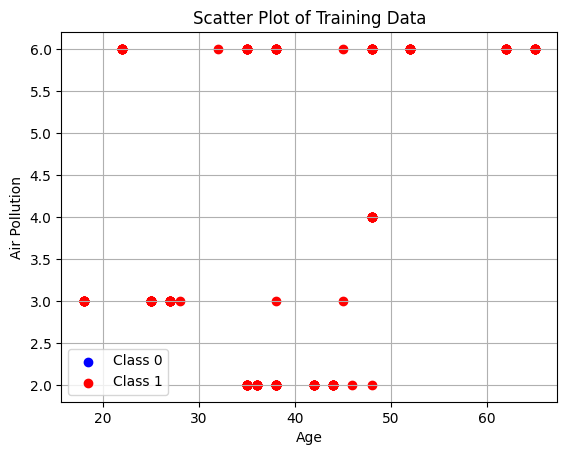

<ipython-input-20-2448ed9c9d5d>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


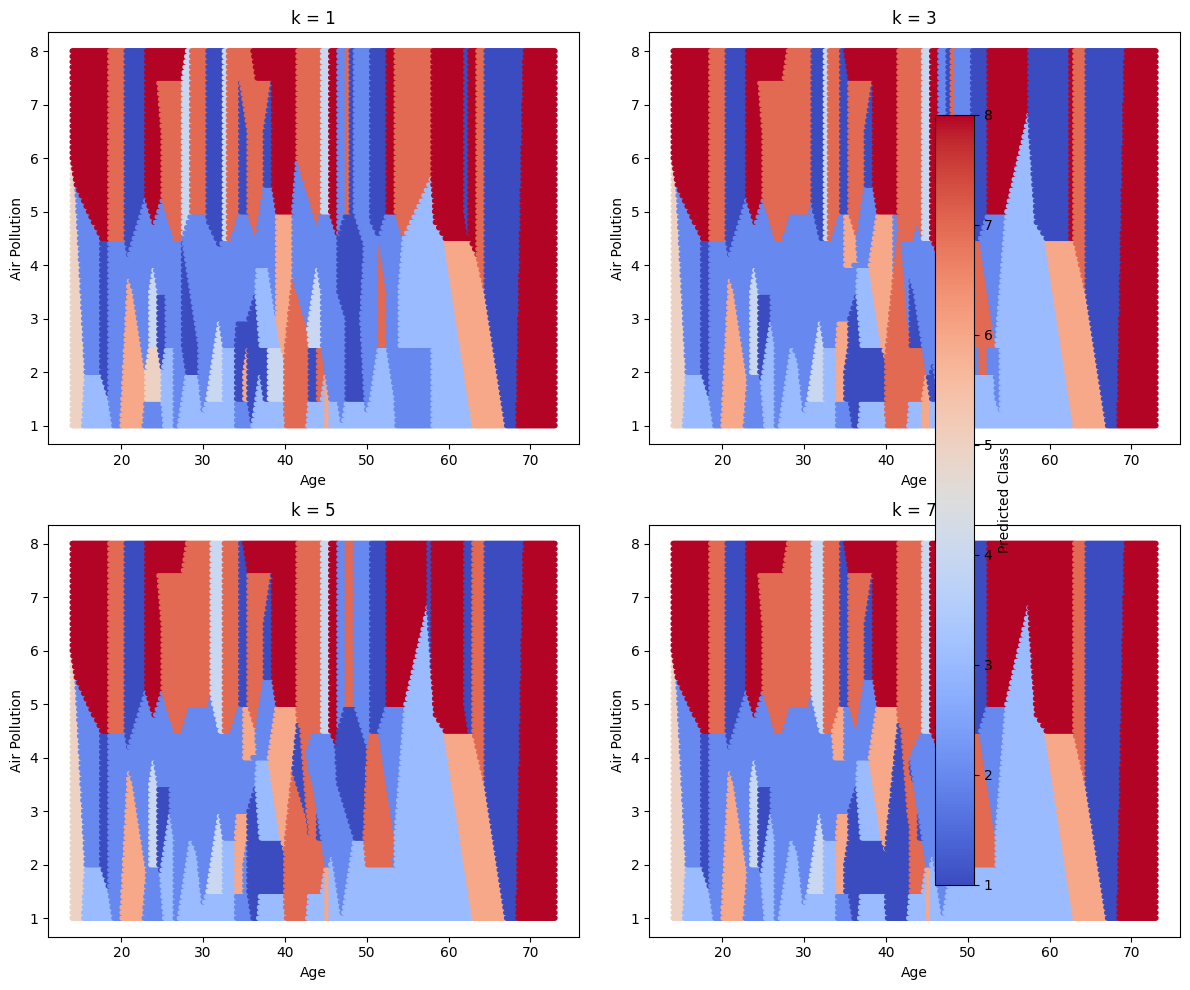

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("/cancer patient data sets.csv")


# A3 - Scatter Plot of Training Data
features = ['Age', 'Air Pollution']
classes = ['Smoking']

# Extract the selected features and classes
X_train = data[features].values
y_train = data[classes].values.flatten()

# Separate points based on class
class0_points = X_train[y_train == 0]
class1_points = X_train[y_train == 1]

# Plot the training data
plt.scatter(class0_points[:, 0], class0_points[:, 1], color='blue', label='Class 0')
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='red', label='Class 1')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.grid(True)
plt.show()

# A5 - k-NN Classifier and Test Data Output
# Generate test set data
x_values_test = np.arange(min(X_train[:, 0]), max(X_train[:, 0]) + 0.1, 0.1)
y_values_test = np.arange(min(X_train[:, 1]), max(X_train[:, 1]) + 0.1, 0.1)
X_test, Y_test = np.meshgrid(x_values_test, y_values_test)
test_data = np.c_[X_test.ravel(), Y_test.ravel()]

# Different values of k to observe the change in class boundary lines
k_values = [1, 3, 5, 7]

# Create subplots for each k value
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    # Classify test points using k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    predicted_classes = knn_classifier.predict(test_data)
    predicted_classes = predicted_classes.reshape(X_test.shape)

    # Plot the test data with predicted class colors
    ax = axes[i // 2, i % 2]
    scatter = ax.scatter(X_test, Y_test, c=predicted_classes, cmap='coolwarm', marker='.')
    ax.set_title(f'k = {k}')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

# Add a common colorbar for all subplots
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', ticks=np.unique(y_train))
cbar.set_label('Predicted Class')

plt.tight_layout()
plt.show()




7


In [9]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


data = load_iris()
X_train = data.data
y_train = data.target

param_grid = {'n_neighbors': np.arange(1, 21)}  # searching for k from 1 to 20

# Create kNN classifier
knn_classifier = KNeighborsClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Best k found using RandomizedSearchCV:", random_search.best_params_['n_neighbors'])
print("Best accuracy found using RandomizedSearchCV:", random_search.best_score_)

# GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best k found using GridSearchCV:", grid_search.best_params_['n_neighbors'])
print("Best accuracy found using GridSearchCV:", grid_search.best_score_)

Best k found using RandomizedSearchCV: 6
Best accuracy found using RandomizedSearchCV: 0.9800000000000001
Best k found using GridSearchCV: 6
Best accuracy found using GridSearchCV: 0.9800000000000001
